In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import os
uber=os.getcwd()+"/Uber Request Data.csv"
uber=pd.read_csv(uber)


In [4]:
new=uber['Request timestamp'].str.split(" ",n=1,expand=True)
uber['Request date']=new[0]
uber['Request time']=new[1]
new1=uber['Drop timestamp'].str.split(" ",n=1,expand=True)
uber['Drop date']=new1[0]
uber['Drop time']=new1[1]


In [5]:
#THESE COLUMNS ARE OF NO USE NOW
uber=uber.drop(['Drop timestamp'],axis=1)
uber=uber.drop(['Request timestamp'],axis=1)


In [6]:
#AS WE HAVE NO ROLE OF DROP DATE AND DROP TIME IN VISUALLIZING THE MAIN FACTORS WHICH ARE
#AFFECTING THE FINANCIAL CONDITION OF THE COMPANY  SO THESE COLUMNS SHOULD BE
#DROPPED
uber=uber.drop(['Drop time'],axis=1)
uber=uber.drop(['Drop date'],axis=1)

In [7]:
table9 = pd.crosstab(index=uber["Status"], 
                          columns=uber["Driver id"].loc[uber["Driver id"]==[84]])


In [9]:
table9
#WE CAN SEE THAT MOST OF THE CARS CANCELLED IS FROM (DRIVER ID ==84) ,THERE CAN BE SOME 
#REASONS LIKE HE TAKES MUCH TIME TO PICK UP THE CUSTOMER ,HIS BEHAVIOUR ,SO HE SHOULD BE
#MONITORED

Driver id,84.0
Status,
Cancelled,12
Trip Completed,9


In [19]:
#WE ARE FOCUSSING ON THE POINT WHY AND WHERE MOST OF THE CABS WERE NOT AVAILABLE
#SO THE COLUMN [DRIVER ID] IS OF NO USE AND WE SHOULD DROP IT
uber=uber.drop(['Driver id'],axis=1)

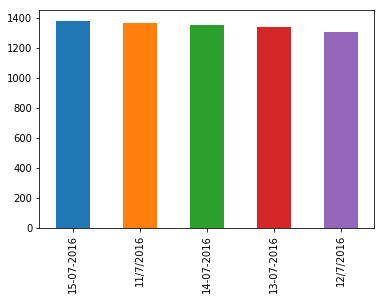

In [20]:
uber['Request date'].value_counts().plot.bar()
#WE CAN OBSERVE FROM THE COUNT PLOT THAT THE CUSTOMERS HAVE REQUESTED FOR UBER MOSTLY 
#ON DATE 11/7/2016 AND 15/07/2016 SO THE COMPANY SHOULD TAKE THIS AS A NOTE AND MORE
#CARS SHOULD BE AVAILABE ON THESE DATES

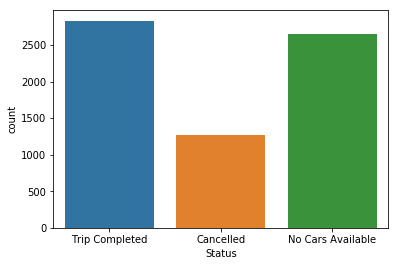

In [6]:
sns.countplot(x='Status',data=uber)
#BY THIS PLOT WE CAN CONCLUDE THAT COMPANY IS SUFFERING FROM A HUGE LOSS BECAUSE OF
#STATUS(NO CARS AVAILABLE) SO THE UBER COMPANY HAD TO INCREASE THE NO OF CARS 


In [7]:
table = pd.crosstab(index=uber["Status"], 
                          columns=uber["Request date"])


In [8]:
table
#BY CROSSTAB WE CAN SEE THAT THE COMPANY IS FACING MAXIMUM LOSS ON THE DATE ON 14 AND 15
#AS MAXIMUM NO OF CARS WERE NOT AVAILABLE ON THESE DAYS SO WE SHOULD AVAIL MORE CARS ON 
#THESE DAYS MOST OF THE TRIP HAD BEEN CANCELLED ON THE DATE 11 AND 13 WHICH RESULT IN LOSS
#OF TIME AND MONEY

Request date,11/7/2016,12/7/2016,13-07-2016,14-07-2016,15-07-2016
Status,,,,,
Cancelled,262,240,270,252,240
No Cars Available,504,505,490,571,580
Trip Completed,601,562,577,530,561


In [9]:
table1= pd.crosstab(index=uber["Pickup point"], 
                          columns=uber["Request date"])


In [10]:
table1
#MORE CABS SHOULD BE AVAILABLE ON THE AIRPORT ON THE DATE 12/7/2016
#AND REST DAYS MORE CABS SHOULD BE FREE ON THE CITY SIDE

Request date,11/7/2016,12/7/2016,13-07-2016,14-07-2016,15-07-2016
Pickup point,,,,,
Airport,661,684,663,601,629
City,706,623,674,752,752


In [27]:
table3= pd.crosstab(index=uber["Pickup point"], 
                          columns=uber["Request time"])


In [26]:
table3
#FROM TABLE3 WE CAN CONCLUDE THAT MOST OF THE PASSENGERS NEED CAB AT THE MORNING TIME IE
#FROM 5AM TO 10 AM FROM THE AIRPORT MAY BE SOME PLANE ARRIVAL TIME CAN BE IN THESE TIME 
#INTERVALS SO  CARS SHOULD BE AVAILABLE IN THE AIRPORT SIDE IN THE MORNING TIME

Request time,00:00:24,00:02:14,00:03:39,00:03:40,00:03:46,00:03:52,00:04:44,00:05:00,00:06:12,00:06:34,...,9:49,9:50,9:51,9:52,9:53,9:54,9:55,9:56,9:57,9:59
Pickup point,,,,,,,,,,,,,,,,,,,,,
Airport,0,1,1,1,0,1,0,1,0,1,...,0,1,0,0,0,0,1,2,0,1
City,1,0,0,0,1,0,1,0,1,0,...,1,3,1,3,1,4,2,2,2,4


In [23]:
#CHANGING THE DATATYPE TO (datetime)
uber1=pd.to_datetime(uber['Request time'])


In [20]:
table10= pd.crosstab(index=uber["Status"], 
                          columns=uber["Pickup point"])


In [24]:
table10
#we can see most of the cars were not available from the airport so 
#the no of cars should be increased on the airport side
#ALSO THE POINT SHOULD BE NOTED THAT MOST OF THE TRIP WAS CANCELLED FROM CITY SIDE 


Pickup point,Airport,City
Status,,
Cancelled,198,1066
No Cars Available,1713,937
Trip Completed,1327,1504
